# Flight Ticket Price Prediction

- **Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable.**

- **Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.**

## Data Overview
Here each data point corresponds to trip of flight from one city to another.

- Airline: The name of the airline.

- Date_of_Journey: The date of the journey

- Source: The source from which the service begins.

- Destination: The destination where the service ends.

- Route: The route taken by the flight to reach the destination.

- Dep_Time: The time when the journey starts from the source.

- Arrival_Time: Time of arrival at the destination.

- Duration: Total duration of the flight.

- Total_Stops: Total stops between the source and destination.

- Additional_Info: Additional information about the flight

- Price(target): The price of the ticket

## Table of Content

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Data Cleaning__
    
* __Step 4: Exploratory Data Analysis__
    
* __Step 5: Building Model__

### Type of Machine Learning task :
- It is an regression problem where given a set of features we need to predict the price of ticket from one city to another.

### Performace Metric
- Since it is an regression problem we will use Root Mean Squared error (RMSE) and Adj.R-squared as regression metric.

### Step 1: Importing the Relevant Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from math import sqrt
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Step 2: Data Inspection

In [2]:
os.chdir(r"C:\Users\vishw\Pictures\project")
os.getcwd()

'C:\\Users\\vishw\\Pictures\\project'

In [3]:
airline = pd.read_excel('Data_Train.xlsx')

In [4]:
airline.shape

(10683, 11)

In [5]:
#ratio of null values
airline.isnull().sum()/airline.shape[0] *100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

* ___We have 0.009% of missing value in Route and Total_Stops, files___

In [6]:
#categorical features
categorical = airline.select_dtypes(include =[np.object])
print("Categorical Features in Airline Data Set:",categorical.shape[1])

#numerical features
numerical= airline.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Airline Data Set:",numerical.shape[1])

Categorical Features in Airline Data Set: 10
Numerical Features in Airline Data Set: 1


In [7]:
airline.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


The maximum ticket price is Rs.79512 and minimum is Rs.1759.

### Step 3: Data Cleaning

Why missing values treatment is required?
Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

In [8]:
airline.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
airline.dropna(axis=0,inplace=True)

In [10]:
airline[['Route','Total_Stops']].isnull().sum()

Route          0
Total_Stops    0
dtype: int64

### Step 4: Exploratory Data Analysis

In [11]:
airline.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
airline.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
airline.shape

(10682, 11)

**Droping the Duplicate Rows:**

In [14]:
airline = airline.drop_duplicates()
airline.shape

(10462, 11)

It looks like there were around 220 duplicate rows. So it is good idea to drop them

**Sorting the entier dataset on date of journey.**

In [15]:
airline.sort_values('Date_of_Journey', inplace = True)

**Converting the Date_of_journey into date, month and year.**

In [16]:
airline['year'] = pd.DatetimeIndex(airline['Date_of_Journey']).year
airline['month'] = pd.DatetimeIndex(airline['Date_of_Journey']).month
airline['Day'] = pd.DatetimeIndex(airline['Date_of_Journey']).day

In [17]:
# checking on this column
airline['Additional_Info'].unique()

array(['No info', 'Change airports', '1 Long layover', 'Business class',
       'No Info', '1 Short layover', 'Red-eye flight', '2 Long layover',
       'In-flight meal not included', 'No check-in baggage included'],
      dtype=object)

In [18]:
## 'No info' is same as 'No Info'. So replacing them with single common label.
airline['Additional_Info'].replace('No Info', 'No info', inplace = True)

Text(0, 0.5, 'Price of ticket')

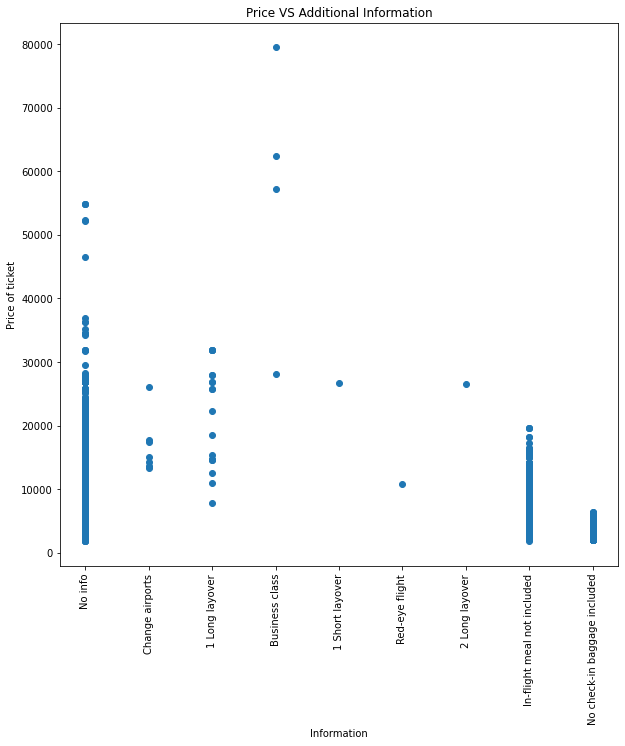

In [19]:
## Price vs Additional Information
plt.figure(figsize = (10, 10))
plt.title('Price VS Additional Information')
plt.scatter(airline['Additional_Info'], airline['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

From above scatter plot it is clear that the ticket prices for Business class is higher which is quite obivious.

Text(0, 0.5, 'Count of flights')

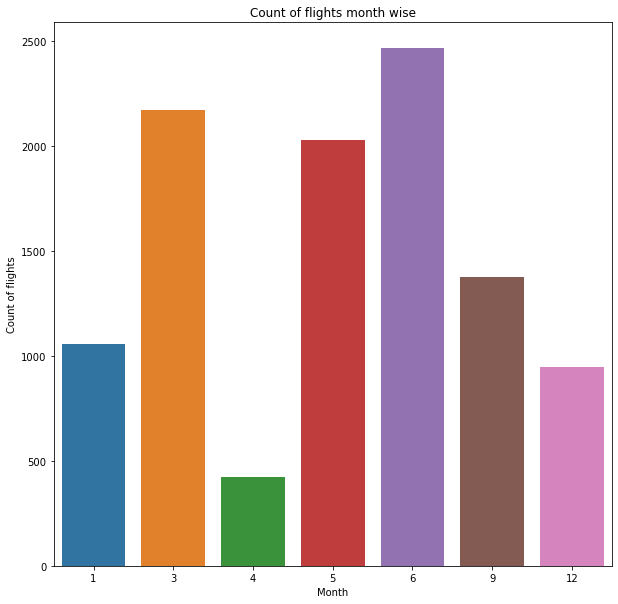

In [20]:
## Month vs count of flights
plt.figure(figsize = (10 , 10))
plt.title('Count of flights month wise')
sns.countplot(x = 'month', data = airline)
plt.xlabel('Month')
plt.ylabel('Count of flights')

There are around 2500 flights scheduled in the month of may so at this time can be the peak month for the airlines as compared to april which seems like slack season for airlines.

**Converting sparse classes of Airline into one category**

In [21]:
airline['Airline'].replace(['Trujet', 'Vistara Premium economy'], 'Another', inplace = True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

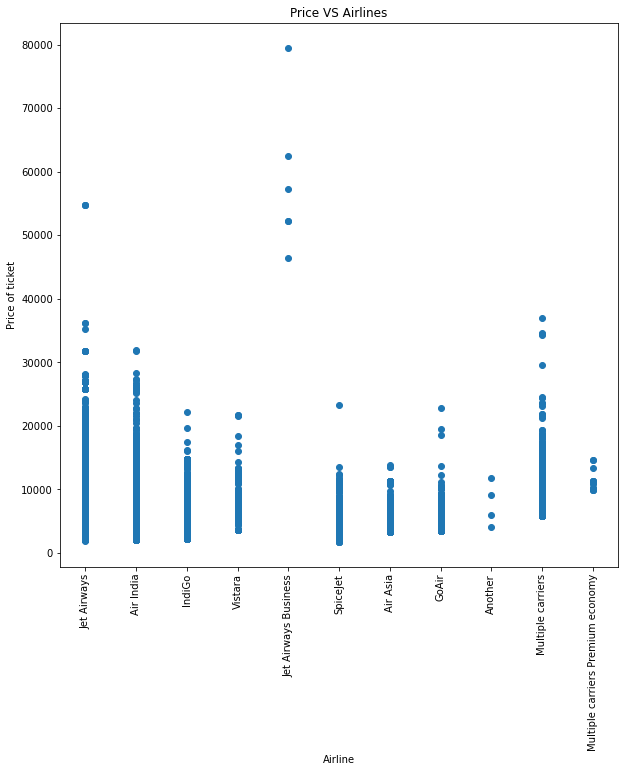

In [22]:
## Price vs Airline
plt.figure(figsize = (10, 10))
plt.title('Price VS Airlines')
plt.scatter(airline['Airline'], airline['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

The ticket rate for Jet Airways Business airline is high.

**Converting the Total_Stops into numbers and dropping the rows with NaN.**

In [23]:
airline[airline['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,Day


In [24]:
airline.dropna(axis = 0, inplace = True) # droping the na (just in case only)

In [25]:
# function to convert the stops to number
def convert_into_stops(X):
    if X == '4 stops':
        return 4
    elif X == '3 stops':
        return 3
    elif X == '2 stops':
        return 2
    elif X == '1 stop':
        return 1
    elif X == 'non stop':
        return 0

In [26]:
airline['Total_Stops'] = airline['Total_Stops'].map(convert_into_stops) # calling the function 

In [27]:
airline['Total_Stops']

8536     1.0
10149    2.0
5701     2.0
4829     1.0
6558     NaN
        ... 
6944     2.0
8086     1.0
3683     1.0
3693     1.0
6586     1.0
Name: Total_Stops, Length: 10462, dtype: float64

In [28]:
# just incase after the above process done we got nan, this will solve the issue
airline.fillna(0, inplace  = True) # filling 0 in the place of nan
airline['Total_Stops'] = airline['Total_Stops'].apply(lambda x : int(x)) # solving through lambda

In [29]:
airline['Total_Stops']

8536     1
10149    2
5701     2
4829     1
6558     0
        ..
6944     2
8086     1
3683     1
3693     1
6586     1
Name: Total_Stops, Length: 10462, dtype: int64

In [30]:
airline['Total_Stops'].value_counts() # checking the values count

1    5625
0    3475
2    1318
3      43
4       1
Name: Total_Stops, dtype: int64

**Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.**

In [31]:
def flight_dep_time(X):
    '''
    This function takes the flight Departure time 
    and convert into appropriate format.
    '''
    if int(X[:2]) >= 0 and int(X[:2]) < 6:
        return 'mid_night'
    elif int(X[:2]) >= 6 and int(X[:2]) < 12:
        return 'morning'
    elif int(X[:2]) >= 12 and int(X[:2]) < 18:
        return 'afternoon'
    elif int(X[:2]) >= 18 and int(X[:2]) < 24:
        return 'evening'

In [32]:
# altering the dep_time and saving it in a new name as flight_time
airline['flight_time'] = airline['Dep_Time'].apply(flight_dep_time)

Text(0, 0.5, 'Count of flights')

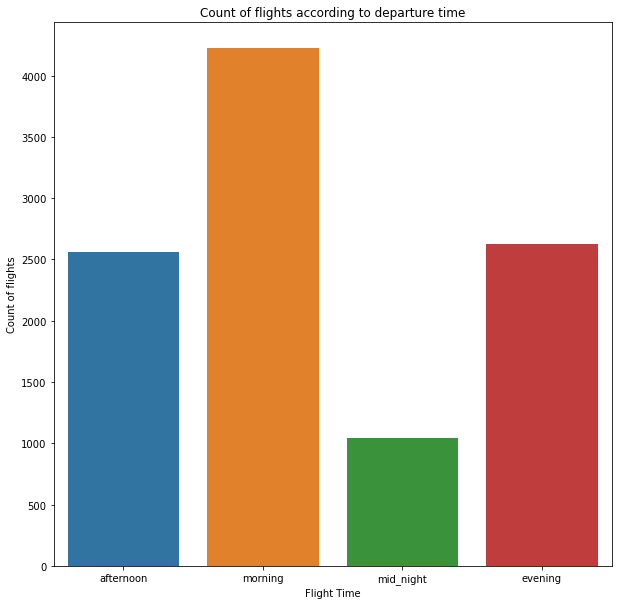

In [33]:
# flight time vs count of the fligts
plt.figure(figsize = (10, 10))
plt.title('Count of flights according to departure time')
sns.countplot(x = 'flight_time', data = airline)
plt.xlabel('Flight Time')
plt.ylabel('Count of flights')

There are more number of flights in the morning time as compared to other time

**Converting the flight duration into seconds.**

In [34]:
def convert_into_seconds(X):
    '''
    This function takes the total time of flight from
    one city to another and converts it into the seconds.
    '''
    a = [int(s) for s in re.findall(r'-?\d+\.?\d*', X)]
    if len(a) == 2:
        hr = a[0] * 3600
        min = a[1] * 60
    else:
        hr = a[0] * 3600
        min = 0   
    total = hr + min
    return total

In [35]:
airline['Duration(sec)'] = airline['Duration'].map(convert_into_seconds) # calling the function and solving it

In [36]:
airline.corr() # correlation of the numerical variables

,Total_Stops,Price,year,month,Day,Duration(sec)
Total_Stops,1.000000,0.602013,NaN,0.065438,-0.035371,0.728123
Price,0.602013,1.000000,NaN,0.008662,-0.171142,0.501886
year,NaN,NaN,NaN,NaN,NaN,NaN
month,0.065438,0.008662,NaN,1.000000,-0.265200,0.056340
Day,-0.035371,-0.171142,NaN,-0.265200,1.000000,-0.047321
Duration(sec),0.728123,0.501886,NaN,0.056340,-0.047321,1.000000


It is important to notice that the correlation for 'year' is shown NaN. This is because that feature is not vary at all.

**Analysing the Price Column Alone**

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

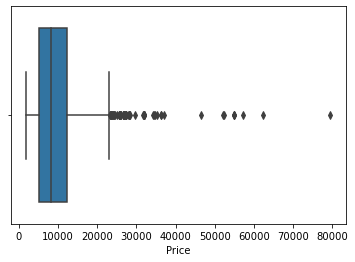

In [37]:
# using the boxplot
sns.boxplot(airline['Price'])

As we can see that there are some points which are seeems like outliers but we cannot remove them because these can be flight ticket price also.

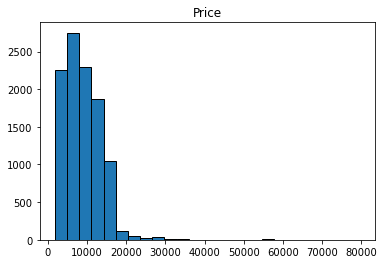

In [38]:
airline.hist(column='Price',bins=25,grid=False,edgecolor="black")
plt.show()

As we can see that it is right side skewed

## Encoding the dummy varibales (for categorical features).

In [39]:
airline = pd.get_dummies(airline, columns = ['Airline', 'Source', 'Destination', 'Additional_Info', 'flight_time'])

In [40]:
pd.set_option('display.max_columns', 50)
airline.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,year,month,Day,Duration(sec),Airline_Air Asia,Airline_Air India,Airline_Another,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,flight_time_afternoon,flight_time_evening,flight_time_mid_night,flight_time_morning
8536,01/03/2019,BLR → BOM → DEL,14:05,09:30 02 Mar,19h 25m,1,25735,2019,1,3,69900,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
10149,01/03/2019,BLR → VGA → VTZ → DEL,10:30,17:45,7h 15m,2,17461,2019,1,3,26100,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
5701,01/03/2019,BLR → BOM → BHO → DEL,08:50,23:25 02 Mar,38h 35m,2,25430,2019,1,3,138900,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4829,01/03/2019,BLR → BOM → DEL,05:45,20:20,14h 35m,1,27992,2019,1,3,52500,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6558,01/03/2019,BLR → DEL,22:20,01:10 02 Mar,2h 50m,0,11934,2019,1,3,10200,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


**Removing the unused features.**

In [41]:
airline.drop(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration'], axis = 1, inplace = True)

**Saving the final dataframe to directory.**

In [42]:
os.getcwd()

'C:\\Users\\vishw\\Pictures\\project'

In [43]:
airline.to_csv('final_flight_data.csv', index = None)

In [44]:
df = pd.read_csv('final_flight_data.csv')
df.head()

,Total_Stops,Price,year,month,Day,Duration(sec),Airline_Air Asia,Airline_Air India,Airline_Another,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,flight_time_afternoon,flight_time_evening,flight_time_mid_night,flight_time_morning
0,1,25735,2019,1,3,69900,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
1,2,17461,2019,1,3,26100,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
2,2,25430,2019,1,3,138900,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,27992,2019,1,3,52500,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,11934,2019,1,3,10200,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


### Step 5: Building Model

___Applying Linear Regression,Decision Tree Regressor:___

In [45]:
X = airline.drop(['Price','year'], axis = 1)
y = np.log(airline['Price']) # applying np.log(due to the price is right skewed), using this we adjusted the skewness

In [46]:
# 20% data as validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

In [47]:
algos = [LinearRegression(),  Ridge(), Lasso(),
        DecisionTreeRegressor(random_state = 0)]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'Decision Tree Regressor']

rmse_list = []
adj_r_square_list = []

In [48]:
for name in algos:                                  # iterating the algorithms in the above list
    model = name                                    # name of the model applying
    model.fit(X_train,y_train)                      # fitting the train data
    y_pred = model.predict(X_test)                 # based on the fitted model, the test data is predicted
    MSE= mse(y_test,y_pred) # claculating the mean square error
    rmse = np.sqrt(MSE)                             # taking the square_root on the mse
    rmse_list.append(rmse)                          # appending it into rmse list
    adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    adj_r_square_list.append(adj_r2)                  # appending it into r_square_list

In [49]:
evaluation = pd.DataFrame({'MODEL': names,
                           'RMSE': rmse_list,
                           'Adj.R-SQUARED': adj_r_square_list})

In [50]:
evaluation

,MODEL,RMSE,Adj.R-SQUARED
0,Linear Regression,0.244418,0.773126
1,Ridge Regression,0.244362,0.773229
2,Lasso Regression,0.417007,0.339602
3,Decision Tree Regressor,0.176832,0.881249


As we can clearly see **Decision Tree regressor** performs slighlty better than **Linear Regression** and **Ridege Regression**. But **Lasso Regression** didn't improved the score. so, we are selecting **Decision Tree regressor**

* **Decision Tree regressor** gave **RMSE: 0.176 and Adj.R-SQUARED: 0.88** is the highest value of all the other **Regressor Model**.